# NPS Exploratory Analysis

In [12]:
# Import data from NPS dashboard
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import calendar

In [2]:
os.chdir("S:\\Sales\\Business Analyst Shared Folder\\! Analysis\\Personal Folders\\Gurpal\\MISC\\")
df = pd.read_excel('DrillDown_120190_all_1556028319056.xlsx', sheet_name='Sheet1')
 
print("Column headings:")
print(df.columns.tolist())

Column headings:
['Market', 'Respondent Type', 'Q11_Customer Open-End Comments', 'Q2_How likely is it that you would RECOMMEND us to a friend or family member?', 'Q4_OVERALL, how would you rate your satisfaction with scheduling your sales appointment?', 'Call Center Agent', 'Q6_OVERALL, how would you rate your satisfaction with your entire sales appointment?', 'Sales Representative', 'Sales Representative ID', 'Q8_OVERALL, how would you rate your satisfaction with your installation (1st Product)?', '1st Product Installer', '1st Product Installer ID', 'P1_CrewIDNumber', 'Q10_OVERALL, how would you rate your satisfaction with your installation (2nd Product)?', '2nd Product Installer', '2nd Product Installer ID', 'P2_CrewIDNumber', 'Response Date', '1st Product Installed', '2nd Product Installed', '1st Product - Job Number', '2nd Product - Job Number', 'Respondent First Name', 'Respondent Last Name', 'Phone', 'Email', 'Business Unit', 'Company']


In [3]:
df = df.rename(index=str, columns={"Q11_Customer Open-End Comments": "Comments", "Q2_How likely is it that you would RECOMMEND us to a friend or family member?" : "NPS"})

df.head()

,Market,Respondent Type,Comments,NPS,"Q4_OVERALL, how would you rate your satisfaction with scheduling your sales appointment?",Call Center Agent,"Q6_OVERALL, how would you rate your satisfaction with your entire sales appointment?",Sales Representative,Sales Representative ID,"Q8_OVERALL, how would you rate your satisfaction with your installation (1st Product)?",...,1st Product Installed,2nd Product Installed,1st Product - Job Number,2nd Product - Job Number,Respondent First Name,Respondent Last Name,Phone,Email,Business Unit,Company
0,Colorado Springs,Non-Purchaser,NaN,NaN,NaN,Empire Web User,NaN,Elizabeth Dollar,1VM,NaN,...,Carpet,NaN,NaN,NaN,Margo,Manning,7.193329e+09,rockyandmargo@hotmail.com,Residential,Empire
1,Baltimore,Non-Purchaser,NaN,NaN,NaN,Empire Web User,NaN,Rudolph Jr. Izzie,S7T,NaN,...,LVP,Carpet,FW1768B,W258586,D,Burks,9.199164e+09,d.burks.01@gmail.com,Residential,Empire
2,Minneapolis,Purchaser,NaN,5.0,9.0,Empire Web User,10.0,Shawn Ritter,22D,6.0,...,Laminate,NaN,FG24627,NaN,David,Sorensen,7.634869e+09,david_sorensen64@yahoo.com,Residential,Empire
3,Phoenix,Non-Purchaser,NaN,NaN,NaN,Empire Web User,NaN,Todd Ballard,VVM,NaN,...,Ceramics,NaN,NaN,NaN,Joseph,Faulkner,6.036301e+09,jlfaulk1953@yahoo.com,Residential,Empire
4,Chicago,Purchaser,NaN,1.0,3.0,Luna Web User,1.0,Atlean Thomas,LSR1576,NaN,...,Carpet,NaN,DL6925B,NaN,Miguel,Gonzalez,8.152508e+09,gonzalezcheco@yahoo.com,Residential,Luna


In [4]:
df1 = df[['NPS']]
df2 = df['NPS']

print("How many 0-5 NPS scores:")
print(df1.loc[df2.isin([1,2,3,4,5])].count()[0])
print("How many 9-10 NPS scores:")
print(df1.loc[df2.isin([9,10])].count()[0])
print("How many total NPS scores:")
print(df1.count()[0])
print("Total NPS score:")
print((df1.loc[df2.isin([9,10])].count()[0] - df1.loc[df2.isin([1,2,3,4,5])].count()[0])*100 / df1.count()[0])

How many 0-5 NPS scores:
5086
How many 9-10 NPS scores:
21962
How many total NPS scores:
37152
Total NPS score:
45.42420327304048


In [5]:
nps_df = df.loc[df['NPS'].notnull()]
nps_df = nps_df.loc[nps_df['Comments'].notnull()]

nps_df['class'] = ''
class_label = {'Detractor' : [0,1,2,3,4,5], 
               'Promoter' : [9,10], 
               'Neutral' : [6,7,8]}
               
for label, values in class_label.items():
    nps_df.loc[nps_df.NPS.isin(values),'class'] = label
    
nps_df.shape

(21329, 29)

In [6]:
Stopwords = list(ENGLISH_STOP_WORDS)
tfidf_vectorizor = TfidfVectorizer(min_df=5, 
                             max_df=0.5,
                             analyzer='word',
                             strip_accents='unicode',
                             ngram_range=(1, 3),
                             sublinear_tf=True, 
                             smooth_idf=True,
                             use_idf=True,
                             stop_words=Stopwords)

tfidf_vectorizor.fit(list(nps_df['Comments']))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=5,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['thereupon', 'together', 'hereafter', 'hers', 'eight', 'them', 'so', 'couldnt', 'everything', 'here', 'below', 'a', 'their', 'she', 'over', 'whereupon', 'your', 'as', 'against', 'within', 'for', 'they', 'are', 'an', 'hundred', 'mine', 'co', 'hereby', 'ever', 'only', 'many', 'therein', 'a..., 'inc', 'formerly', 'can', 'herein', 'not', 'almost', 'being', 'somehow', 'ten', 'done', 'someone'],
        strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [21]:
#functions to create graphics below from tf-idf matrices
#adapted from : https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=20):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs, num_class=9):
    fig = plt.figure(figsize=(12, 100), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(num_class, 1, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=16)
        ax.set_ylabel("Word", labelpad=16, fontsize=16)
        ax.set_title(str(df.label) + ' Sentiment Class', fontsize=25)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        
        for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

def most_significant_words_by_class(nps_df,statements,classes):
    class_Xtr = tfidf_vectorizor.transform(nps_df[statements])
    class_y = nps_df[classes]
    class_features = tfidf_vectorizor.get_feature_names()
    class_top_dfs = top_feats_by_class(class_Xtr, class_y, class_features)
    return class_top_dfs

def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

In [22]:
today = datetime.today()
year = []

for val in range(12):
    year.append(datetime(today.year-1, (today + timedelta(val*365/12)).month, 1))

print(year)
for month in year:
    word_df = most_significant_words_by_class(nps_df,'Comments', 'class')
    word_df[0].head()

[datetime.datetime(2019, 2, 1, 0, 0), datetime.datetime(2019, 3, 1, 0, 0), datetime.datetime(2019, 4, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 6, 1, 0, 0), datetime.datetime(2019, 7, 1, 0, 0), datetime.datetime(2019, 8, 1, 0, 0), datetime.datetime(2019, 9, 1, 0, 0), datetime.datetime(2019, 10, 1, 0, 0), datetime.datetime(2019, 11, 1, 0, 0), datetime.datetime(2019, 12, 1, 0, 0), datetime.datetime(2019, 1, 1, 0, 0)]


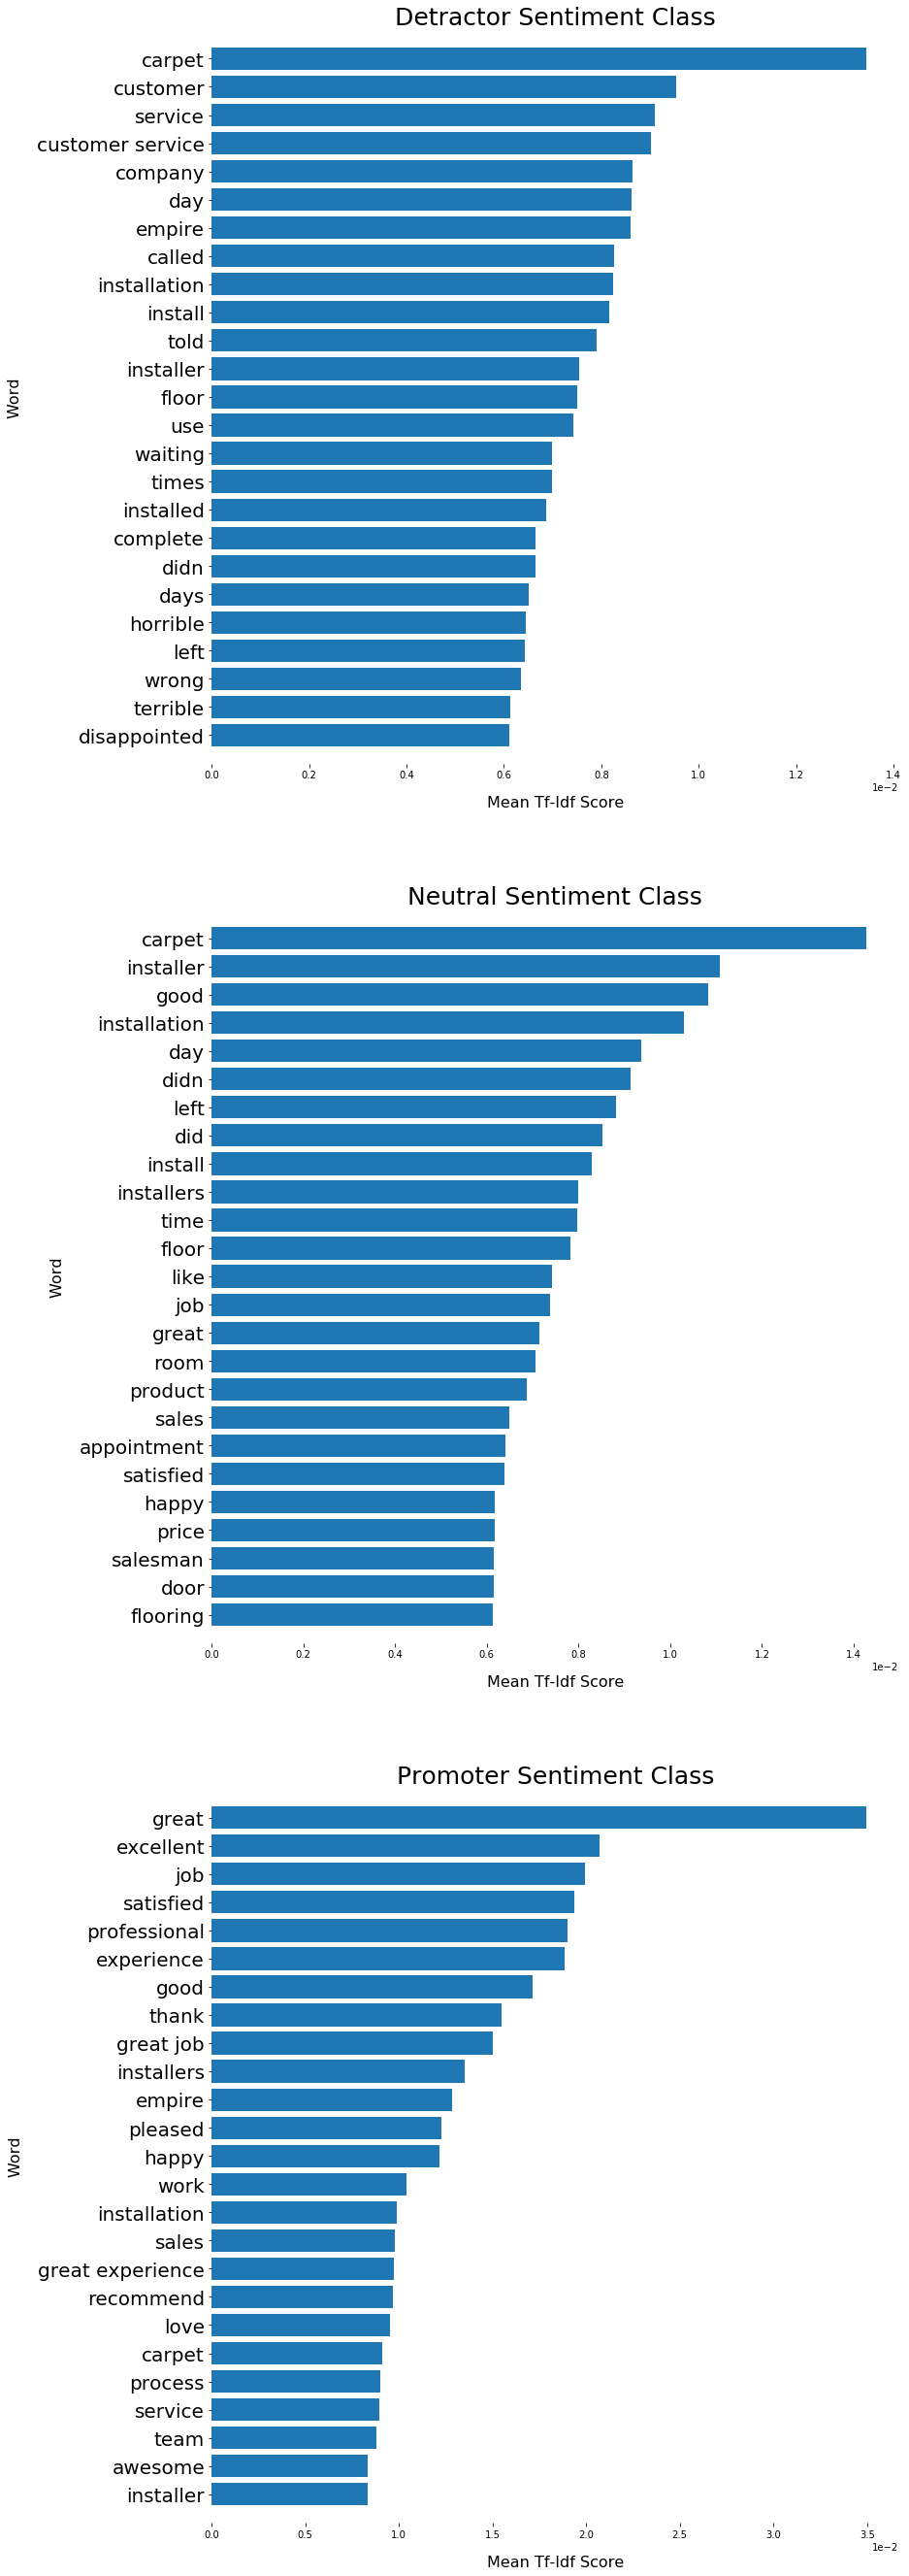

In [23]:
class_Xtr = tfidf_vectorizor.transform(nps_df['Comments'])
class_y = nps_df['class']
class_features = tfidf_vectorizor.get_feature_names()
class_top_dfs = top_feats_by_class(class_Xtr, class_y, class_features)
#print(class_top_dfs)
plot_tfidf_classfeats_h(class_top_dfs, 7)